In [1]:
import sys

import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import pandas as pd

import networkx as nx

import shapely as sh
from shapely import geometry

import utilities.common as uc
import utilities.global_parameters as ug

import utilities.get_random_city as grc

import utilities.get_graph as gg
import utilities.forge_graph as fg
import utilities.visualise_graph as vg
import utilities.get_route as gr

random.seed(0)

%load_ext autoreload
%autoreload 2

INFO: 2020-01-08 11:56:46,167: get_random_city.py: 101:
	76 segments
	0 one-way
	38 two-way


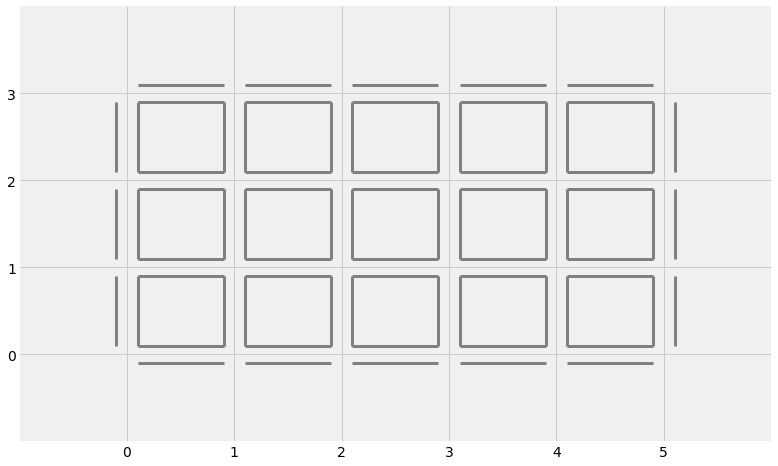

In [2]:
# Make random city. Create a list of dicts — one dict to describe one street segment.
# segment_id  unique id (int)
# direction (int)
#     0 — no_way
#     1 — one_way_direct
#     2 — one_way_reverse
#     3 — two_way
# coordinates start and end point of a segment (list of tuples)
# geometry    segment geometry (shapely linestring)
random_city = grc.get_random_city(
#     city_size=(24, 16),
#     frequencies=(0.3, 0.1, 0.1, 0.5)
    city_size=[6, 4],
    frequencies=[0., 0., 0., 1.]
    )
grc.plot_area(random_city)

INFO: 2020-01-08 11:56:46,513: visualise_graph.py: 119:
	nodes #: 24
	edges #: 76
	strongly connected: True
	disconnected nodes: 0	dead ends:0



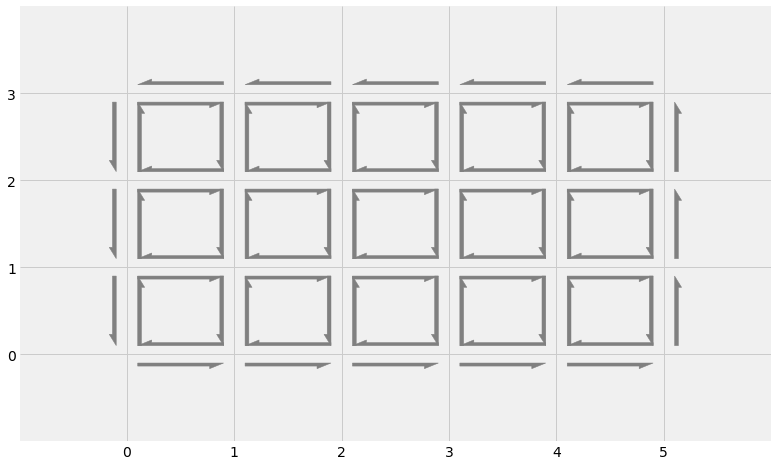

In [3]:
# Get a naive graph for a city.
# Naive graph is a directed graph,
# where nodes are cross-road coordinates (e.g. (0, 0)),
# i.e. one node can have up to 4 in-coming and 4 out-going edges.
naive_g = gg.get_naive_graph(random_city)
vg.visualise_naive_graph(naive_g)

INFO: 2020-01-08 11:56:46,827: visualise_graph.py: 229:
	nodes #: 152
	edges #: 328
	strongly connected: True
	disconnected nodes: 0
	straight drives: 132
	right turns: 60
	left turns: 60
	u-turns: 76
	dead ends: 0


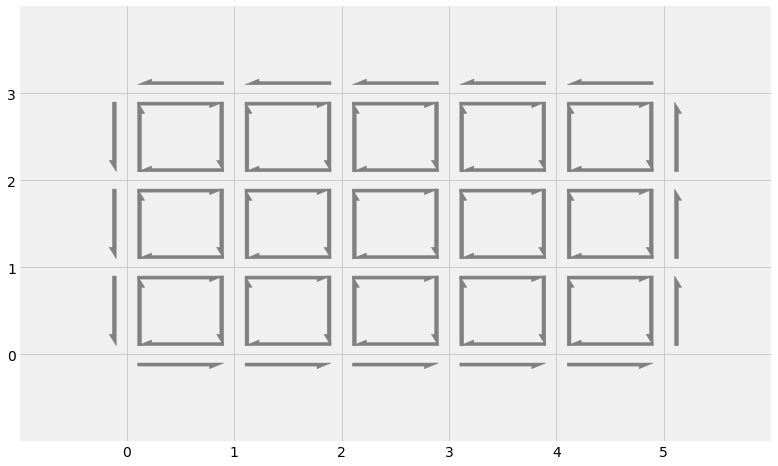

In [4]:
# Get a manoeuvre graph for a city.
# Manoeuvre graph is a directed graph,
# where nodes are the ends of a street segment,
# such that for a two-way street segment X
# the nodes for one way will be X_t, X_h and for the opposite way -X_t, and -X_h.
# There are two types of edges in manoeuvre graph: segment edges and monoeuvre edges.
# Segment edges simply describe a street segment; such edges attributes read 'go_straight';
# such edges are shown in visualisation.
# Manoeuvre edges describe a transition from one segment to another;
# such edge attribute can read anything from {turn_right, make_u_turn, turn_left, go_straight};
# such edges are NOT shown in visualisation.
manoeuvre_g = gg.get_manoeuvre_graph(random_city)

vg.visualise_manoeuvre_graph(manoeuvre_g)

INFO: 2020-01-08 11:56:47,096: forge_graph.py: 278:
	removed 0 nodes
INFO: 2020-01-08 11:56:47,100: visualise_graph.py: 229:
	nodes #: 152
	edges #: 328
	strongly connected: True
	disconnected nodes: 0
	straight drives: 132
	right turns: 60
	left turns: 60
	u-turns: 76
	dead ends: 0


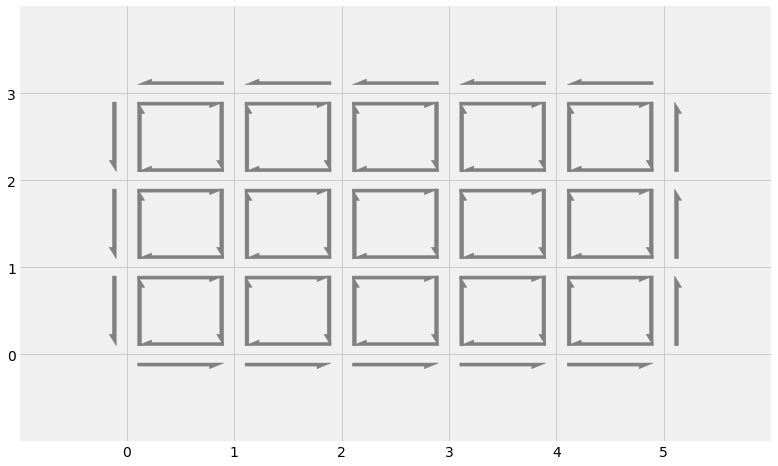

In [5]:
manoeuvre_g = fg.join_split_edges(manoeuvre_g)
vg.visualise_manoeuvre_graph(manoeuvre_g)

INFO: 2020-01-08 11:56:47,371: get_graph.py: 298:
	district borders:
	west-east: 1 - 4
	south-north: 0 - 2
INFO: 2020-01-08 11:56:47,373: visualise_graph.py: 229:
	nodes #: 88
	edges #: 198
	strongly connected: False
	disconnected nodes: 20
	straight drives: 74
	right turns: 40
	left turns: 40
	u-turns: 44
	dead ends: 0


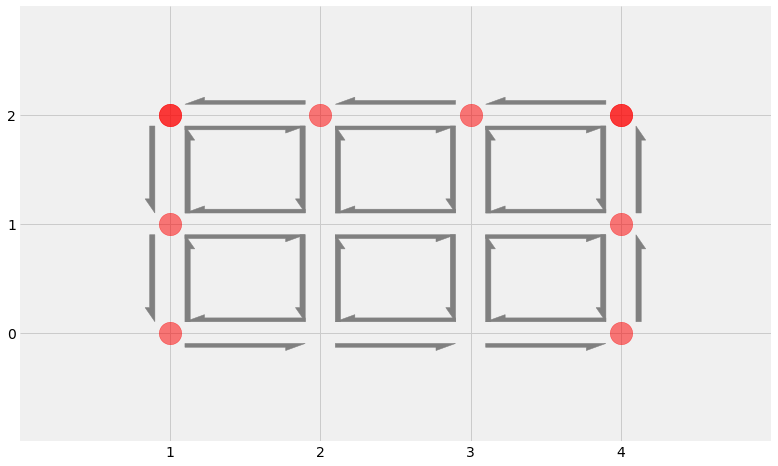

In [6]:
district_g = gg.get_random_district_graph(manoeuvre_g)
vg.visualise_manoeuvre_graph(district_g)

In [7]:
# district_g = fg.add_connecting_grafts(
#     district_g,
#     manoeuvre_g)
# vg.visualise_manoeuvre_graph(district_g)

INFO: 2020-01-08 11:56:47,663: visualise_graph.py: 229:
	nodes #: 68
	edges #: 136
	strongly connected: True
	disconnected nodes: 0
	straight drives: 54
	right turns: 24
	left turns: 24
	u-turns: 34
	dead ends: 0


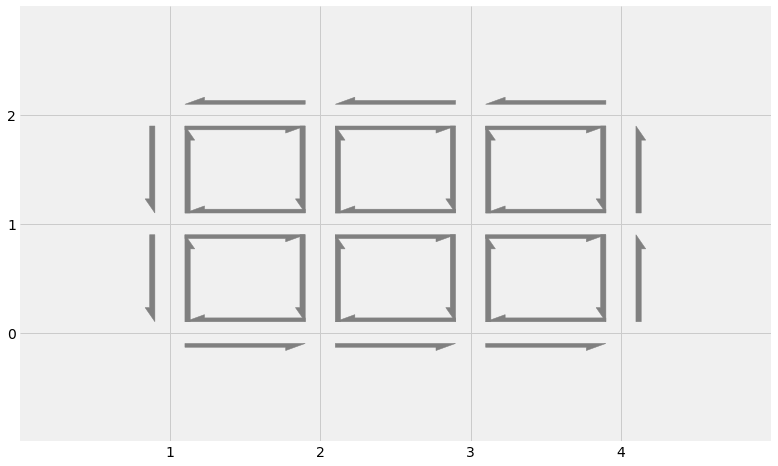

In [8]:
district_g = fg.remove_single_nodes(
    district_g)
vg.visualise_manoeuvre_graph(district_g)

INFO: 2020-01-08 11:56:48,052: visualise_graph.py: 229:
	nodes #: 76
	edges #: 252
	strongly connected: True
	disconnected nodes: 0
	straight drives: 56
	right turns: 60
	left turns: 60
	u-turns: 76
	dead ends: 0
INFO: 2020-01-08 11:56:48,111: visualise_graph.py: 229:
	nodes #: 152
	edges #: 328
	strongly connected: True
	disconnected nodes: 0
	straight drives: 132
	right turns: 60
	left turns: 60
	u-turns: 76
	dead ends: 0


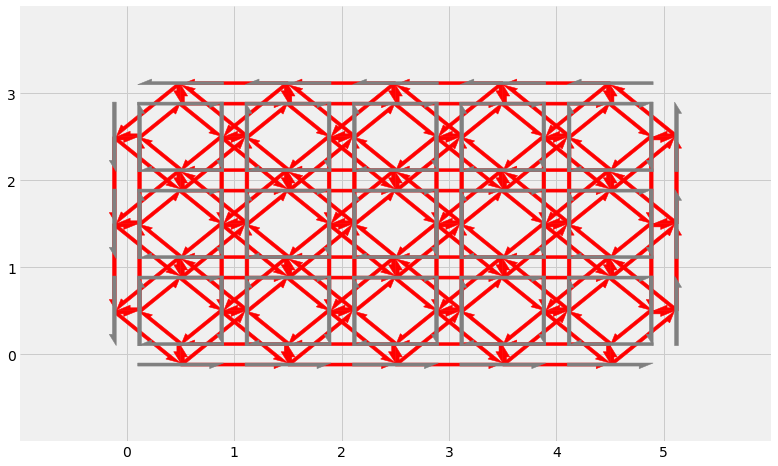

In [9]:
inverted_g = gg.get_inverted_graph(random_city)
vg.visualise_inverted_graph(inverted_g, manoeuvre_g)
# 	straight drives: 464
# 	right turns: 461
# 	left turns: 474
# 	u-turns: 682

In [10]:
# inverted_district_g = gg.get_random_district_g(inverted_g)
# vg.visualise_inverted_g(inverted_district_g)

In [11]:
# inverted_district_g = fg.add_connecting_grafts(
#     inverted_district_g,
#     inverted_g)
# vg.visualise_inverted_g(inverted_district_g)

In [12]:
inverted_g = fg.prune_u_turns(inverted_g)
inverted_g = fg.prune_left_turns(inverted_g)

INFO: 2020-01-08 11:56:48,703: visualise_graph.py: 229:
	nodes #: 76
	edges #: 122
	strongly connected: True
	disconnected nodes: 0
	straight drives: 56
	right turns: 60
	left turns: 6
	u-turns: 0
	dead ends: 0
INFO: 2020-01-08 11:56:48,734: visualise_graph.py: 229:
	nodes #: 152
	edges #: 328
	strongly connected: True
	disconnected nodes: 0
	straight drives: 132
	right turns: 60
	left turns: 60
	u-turns: 76
	dead ends: 0


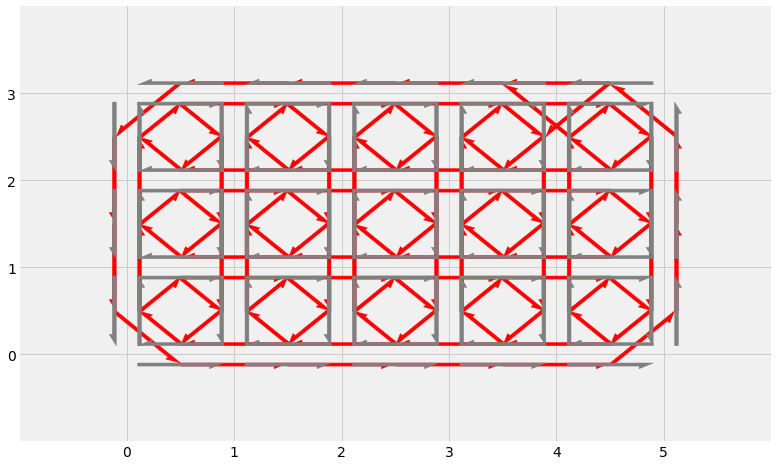

In [13]:
vg.visualise_inverted_graph(inverted_g, manoeuvre_g)

In [14]:
g = inverted_g.copy()

In [15]:
virtual_g = inverted_g.copy()

In [16]:
virtual_g = fg.balance_graph_iteratively(inverted_g)

INFO: 2020-01-08 11:56:49,119: forge_graph.py: 366:
	nodes # 76
	edges # 122
	IMBALANCED NODES:
	excess ins # 16
	excess outs # 16

INFO: 2020-01-08 11:56:49,123: forge_graph.py: 405:
	virtual edges # 16

INFO: 2020-01-08 11:56:49,125: forge_graph.py: 423:
	added 16 edges over 1 cycles



In [17]:
virtual_circuit = gr.get_virtual_path(virtual_g)

In [18]:
real_circuit = gr.get_real_path(
    virtual_circuit,
    inverted_g,
    virtual_g)

INFO: 2020-01-08 11:56:49,179: get_route.py: 47:
	eulerian circuit length 168



In [19]:
g = inverted_g.copy()

In [20]:
# random_path = gr.get_random_path(g)

In [21]:
# random_path_with_min_repetitions = gr.get_random_path_with_min_repetitions(g)

In [22]:
random_city = grc.get_random_city(
    city_size=[2, 1],
    frequencies=[0., 0., 0., 1.],
#     city_size=[6, 4],
#     frequencies=[.2, .15, .15, .5]
    )
inverted_g = gg.get_inverted_graph(random_city)

INFO: 2020-01-08 11:56:49,263: get_random_city.py: 101:
	2 segments
	0 one-way
	1 two-way


In [24]:
vg.get_graph_statistics(inverted_g)

INFO: 2020-01-08 11:57:02,854: visualise_graph.py: 229:
	nodes #: 2
	edges #: 2
	strongly connected: True
	disconnected nodes: 0
	straight drives: 0
	right turns: 0
	left turns: 0
	u-turns: 2
	dead ends: 2


{'straight_drives': [],
 'right_turns': [],
 'left_turns': [],
 'u_turns': [{'weight': 10,
   'geometry': <shapely.geometry.linestring.LineString at 0x11ddd9690>,
   'coordinates': [(0.5, 0.0), (0.5, 0.0)],
   'coordinates_offset': [(0.5, -0.1), (0.5, 0.1)],
   'manoeuvre': 'make_u_turn',
   'type': 'segment'},
  {'weight': 10,
   'geometry': <shapely.geometry.linestring.LineString at 0x11ddd6bd0>,
   'coordinates': [(0.5, 0.0), (0.5, 0.0)],
   'coordinates_offset': [(0.5, 0.1), (0.5, -0.1)],
   'manoeuvre': 'make_u_turn',
   'type': 'segment'}],
 'dead_ends': [1, -1],
 'disconnected_nodes': []}

In [25]:
inverted_g = fg.prune_u_turns(inverted_g)
inverted_g = fg.prune_left_turns(inverted_g)
g = inverted_g.copy()
virtual_g = inverted_g.copy()
virtual_g = fg.balance_graph_iteratively(inverted_g)
virtual_circuit = gr.get_virtual_path(virtual_g)
real_circuit = gr.get_real_path(
    virtual_circuit,
    inverted_g,
    virtual_g)

INFO: 2020-01-08 11:57:12,272: forge_graph.py: 423:
	added 0 edges over 0 cycles

INFO: 2020-01-08 11:57:12,274: get_route.py: 47:
	eulerian circuit length 2



In [26]:
city_size=ug.CITY_SIZE
frequencies=[0., 0., 0., 1.]
random_city = grc.get_random_city(
    city_size=city_size,
    frequencies=frequencies,
    )

x, y = city_size
max_n_segments =  x * (y - 1) + (x - 1) * y

area_statistics = grc.get_area_statistics(random_city)

assert area_statistics['n_segments'] == max_n_segments * 2
assert area_statistics['n_one_way_segments'] == 0
assert area_statistics['n_two_way_segments'] == max_n_segments

INFO: 2020-01-08 11:57:13,270: get_random_city.py: 101:
	1456 segments
	0 one-way
	728 two-way
INFO: 2020-01-08 11:57:13,284: get_random_city.py: 101:
	1456 segments
	0 one-way
	728 two-way


In [ ]:
364 * 2 + 219